In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def plotImage(row, col, index, image, title):
    plt.subplot(row, col, index)
    # Display the magnitude or real part of the complex image
    if np.iscomplexobj(image):
        plt.imshow(np.abs(image), cmap='gray')  # Display magnitude
    else:
        plt.imshow(image, cmap='gray')  # Display real part
    plt.title(title)

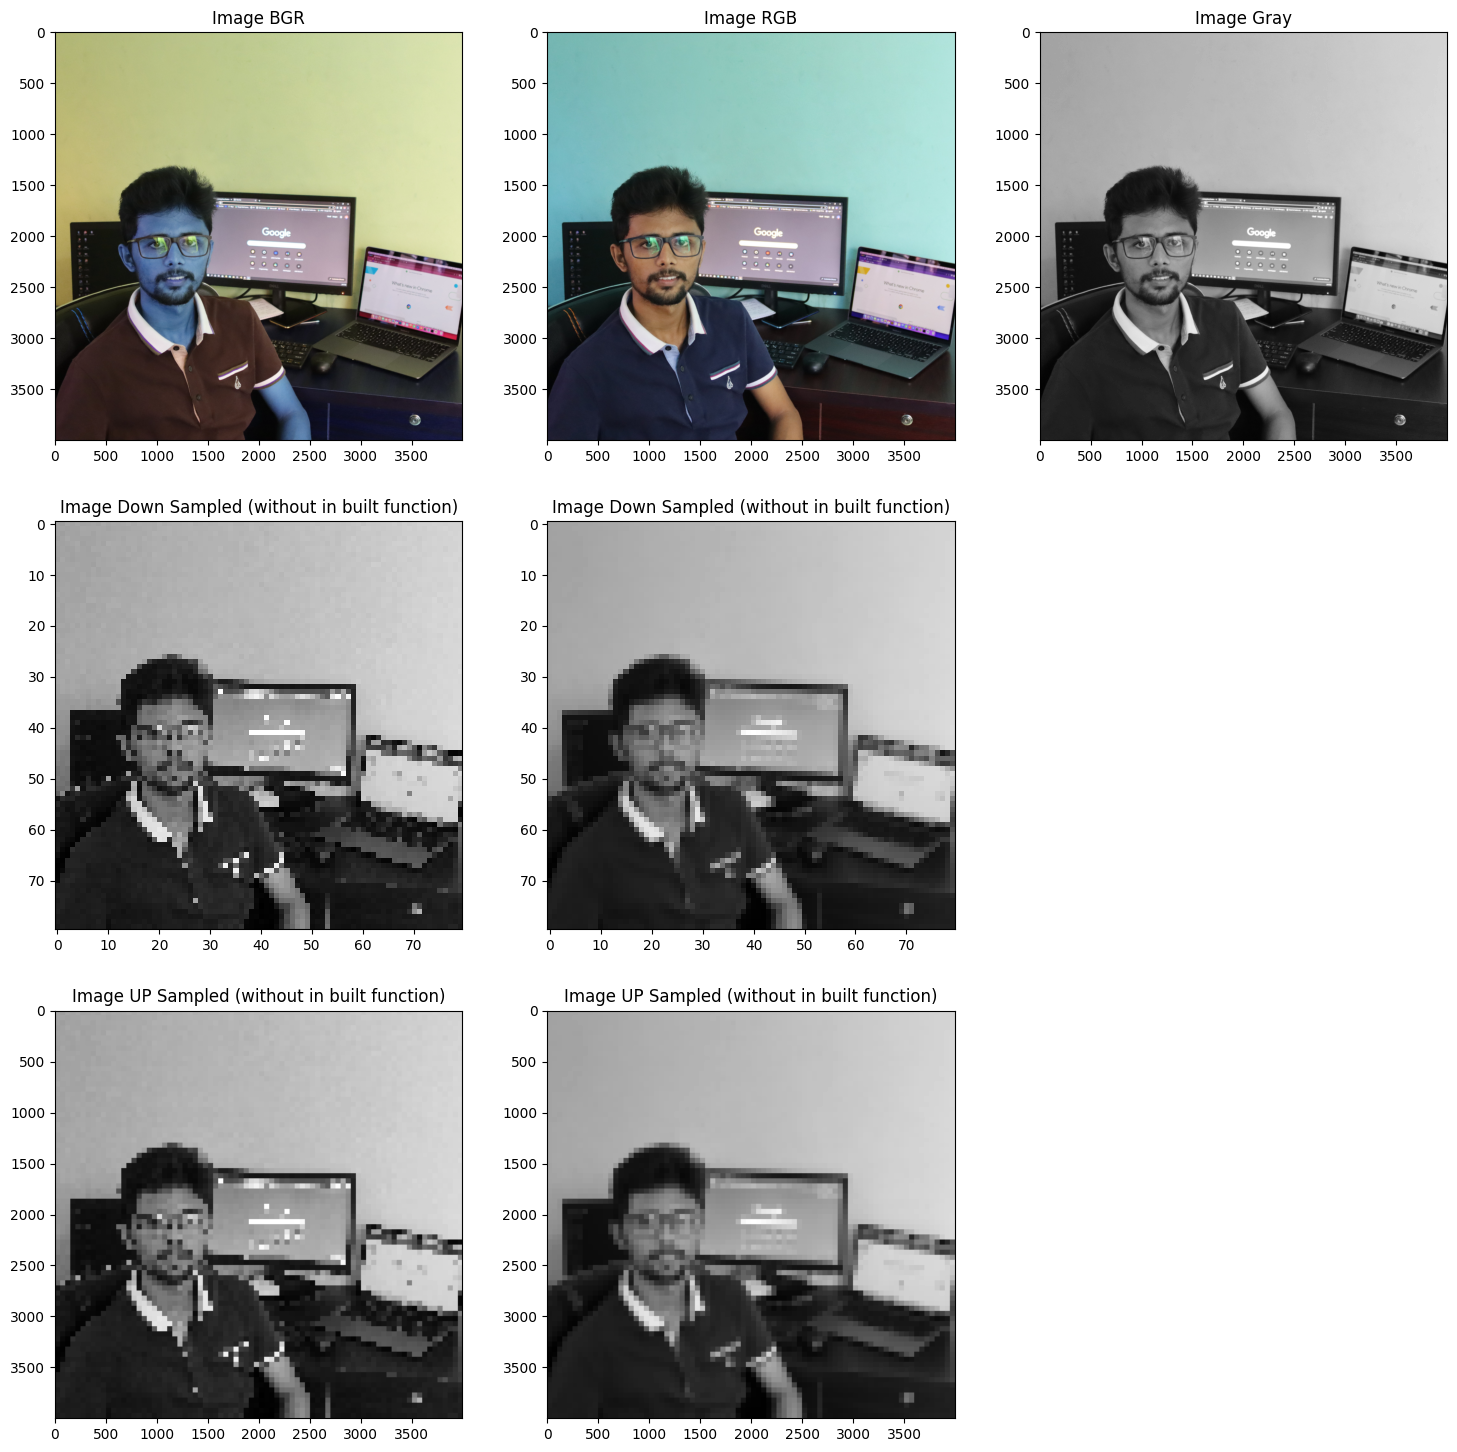

In [17]:
imagePath = "./photos/fahim-cover.jpeg"
imgBGR = cv2.imread(imagePath)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)

# Downsample the image by a factor of 50 using in built function
imgDownSampled = cv2.resize(imgGray, (imgGray.shape[0] // 50, imgGray.shape[1] // 50))

# Downsample the image by a factor of 50 without using in built function
newHeight, newWidth = imgGray.shape[0] // 50, imgGray.shape[1] // 50
imgDownSampled1 = np.zeros((newHeight, newWidth), dtype=np.uint8)

for i in range(newHeight):
    for j in range(newWidth):
        imgDownSampled1[i, j] = np.mean(imgGray[i*50: ((i*50)+50), j*50: ((j*50)+50)])

# UPsample the image by a factor of 50 using in built function
imgUpSampled = cv2.resize(imgDownSampled, (imgDownSampled.shape[0] * 50, imgDownSampled.shape[1] * 50), interpolation=cv2.INTER_NEAREST)

# Downsample the image by a factor of 50 without using in built function
newHeight, newWidth = imgDownSampled1.shape[0] * 50, imgDownSampled1.shape[1] * 50
imgUpSampled1 = np.zeros((newHeight, newWidth), dtype=np.uint8)

for i in range(newHeight):
    for j in range(newWidth):
        imgUpSampled1[i, j] = imgDownSampled1[(i // 50), (j // 50)]

plt.figure(figsize=(18, 18))
plotImage(3, 3, 1, imgBGR, "Image BGR")
plotImage(3, 3, 2, imgRGB, "Image RGB")
plotImage(3, 3, 3, imgGray, "Image Gray")
plotImage(3, 3, 4, imgDownSampled, "Image Down Sampled (without in built function)")
plotImage(3, 3, 5, imgDownSampled1, "Image Down Sampled (without in built function)")
plotImage(3, 3, 7, imgUpSampled, "Image UP Sampled (without in built function)")
plotImage(3, 3, 8, imgUpSampled1, "Image UP Sampled (without in built function)")